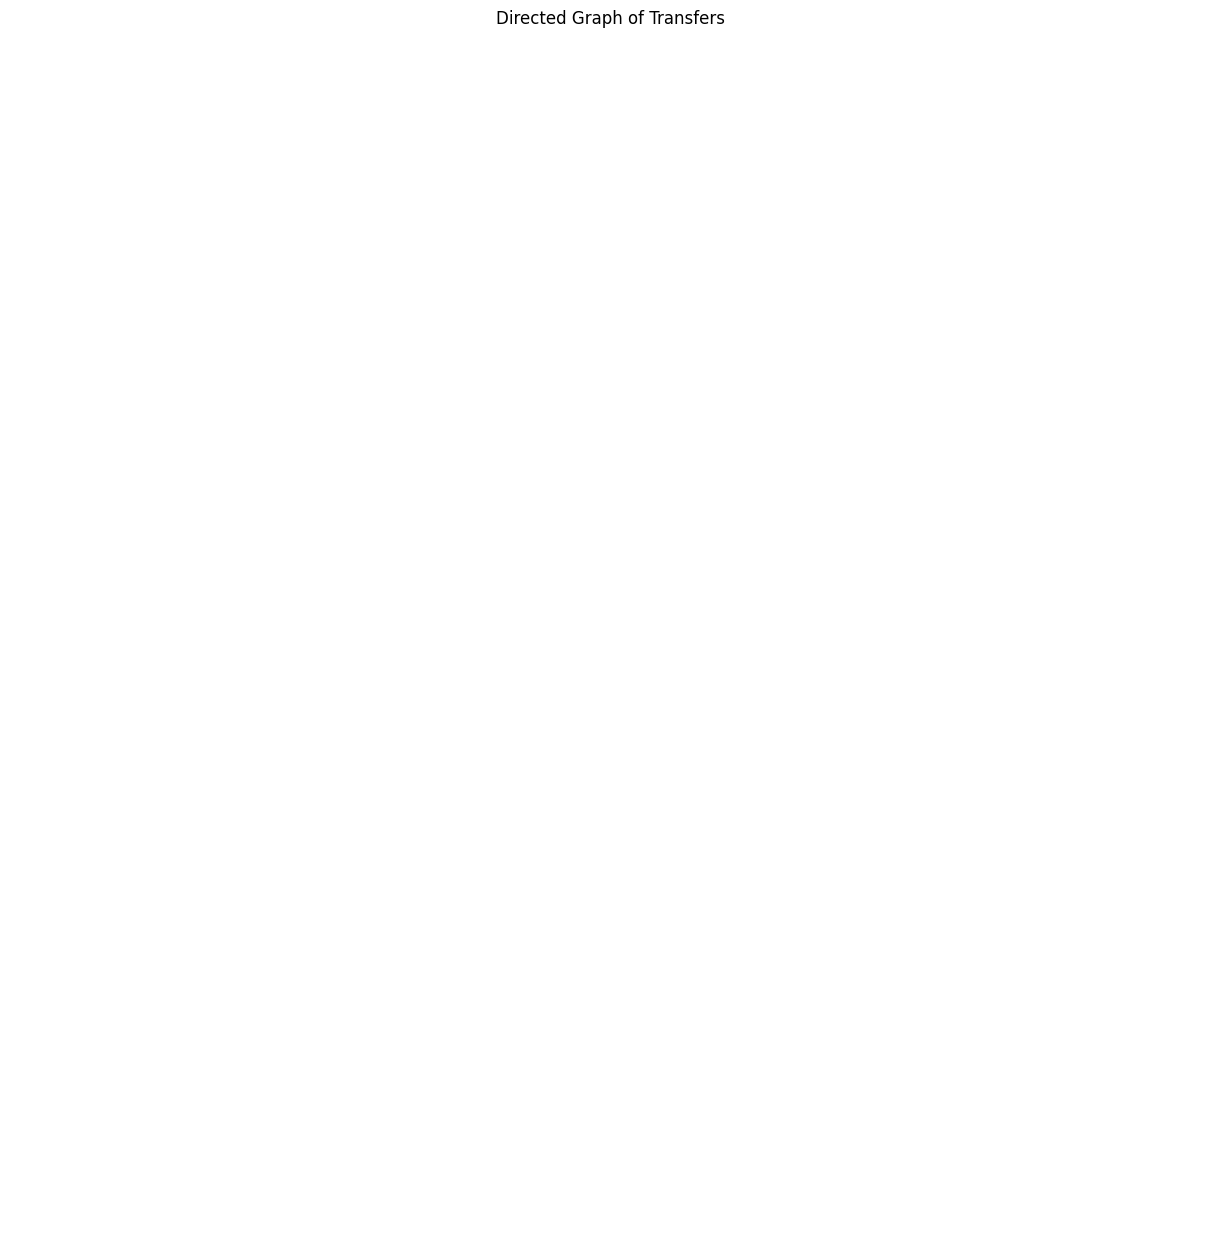

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import io

# Data as provided by the user
data = """
Name	Maximum Capacity (kg)	Transfer Type	Line 1	Line 2	Line 3	Line 4	Line 5	Line 6	Line 7	Line 8	Line 9	Line 10	Line 11	Silo A	Silo B	Silo C	Silo D	Silo E	Silo F	Filling Station A	Filling Station B	Transfer Station A	Transfer Station B	Transfer Station C	Transfer Station D	Warehouse	BT Blending	PKT Blending
Silo A	6000	Continuous																																	275										
Silo B	6000	Continuous																																240										
Silo C	6000	Continuous	831	3018	3018																	677	1829	704	2778	1389	831										
Silo D	6000	Continuous	831	3018	3018																	677	1829	704	2778	1389	831										
Silo E	6000	Continuous	831	3018	3018																	677	1829	704	2778	1389	831										
Silo F	6000	Continuous	831	3018	3018																	677	1829	704	2778	1389	831										
Filling Station A	500	Batch																															5	5	5	5	5							
Filling Station B	500	Batch																															5	5	5	5	5							
Transfer Station A	500	Batch	69	252	252															56	152	59	231	116	69										
Transfer Station B	500	Batch	69	252	252	20	23	56	152	59	231	116	69										
Transfer Station C	500	Batch	69	252	252															56	152	59	231	116	69										
Transfer Station D	500	Batch	69	252	252															56	152	59	231	116	69										
Warehouse	Unlimited	Batch																															5	5	5	5			16	16					
Black Tea Blending	1000	Batch																								27	27	27	27	27	27	1	1					
Loose Tea Blending	1000	Batch																								27	27	27	27	27	27	1	1					
"""

# Convert the string data to a Pandas DataFrame
df = pd.read_csv(io.StringIO(data), sep='\t')

# Filter out any rows that don't have a 'Name' to avoid processing header lines or empty lines
df = df[df['Name'].notna()]

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Iterate over the dataframe and add edges to the graph
for index, row in df.iterrows():
    source = row['Name']
    # Add edges for all lines and stations with specified weights
    for col in df.columns[3:]:
        target = col.strip()
        weight = row[col]
        if pd.notna(weight) and weight != '':  # Check if there is a weight specified
            # Convert weight to an appropriate number, stripping any potential whitespace
            weight = float(str(weight).replace(' ', ''))
            G.add_edge(source, target, weight=weight)

# Draw the graph
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Directed Graph of Transfers')
plt.show()